In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
sns.set()

In [2]:
data = pd.read_csv("data/train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('SalePrice', axis=1)
y = data.SalePrice
X_test = pd.read_csv('data/test.csv')

X_train, X_val ,y_train, y_val = train_test_split(X,y, random_state=16)

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

class PandasTransform(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        
        self.columns_dropped = ['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','YearRemodAdd','YearBuilt','MoSold', 'YrSold','GarageType','GarageYrBlt','GarageFinish','GarageArea','GarageCond','Exterior2nd']
        
        self.cat_col = ['MSZoning','Street','LotShape',
         'LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
         'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageQual','PavedDrive','SaleType','SaleCondition']
        
        self.qc_order = {"na":0,"po":1, "fa":2, "ta":3,'gd':4,'ex':5}
        
        self.col_to_ordinal = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual']
        
        self.catcol_wout_ordinal = ['MSZoning','Street', 'LotShape',
         'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1',
         'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
        
        self.g1 = [['MeadowV', 'BrDale', 'IDOTRR'],['OldTown', 'BrkSide','Edwards','Sawyer','NPkVill','SWISU','NAmes','Blueste','Mitchel','SawyerW'], ['NWAmes','Gilbert','Blmngtn','CollgCr','Crawfor','ClearCr','Somerst',
          'Veenker'],['Timber', 'StoneBr'],['NridgHt', 'NoRidge']]
        
        self.g2 = ['BrkComm',['AsphShn', 'CBlock', 'AsbShng'],['Wd Sdng', 'MetalSd', 'WdShing', 'HdBoard'],['Plywood', 'Stucco', 'BrkFace'],['VinylSd', 'CemntBd'], ['ImStucc', 'Stone']]
        
    def fit(self, X, y= None):
        return self
    
    def transform(self, X):
        X = X.drop(self.columns_dropped,axis=1)
        for col in self.cat_col:
            X[col] = X[col].str.lower()
        X[self.col_to_ordinal] = X[self.col_to_ordinal].fillna("na") 
        X[self.col_to_ordinal] = X[self.col_to_ordinal].replace(self.qc_order)
        
        for x in range(len(self.g1)):
            X = X.replace(self.g1[x], x)
            
        for x in range(len(self.g2)):
            X = X.replace(self.g2[x], x)
        
        X = X.set_index(X['Id'])
        X = X.drop('Id',axis=1)
        
        return X

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

num_col = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
cat_col = ['MSZoning','Street', 'LotShape','LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

custom_pipeline = Pipeline([
    ('pandas_transform', PandasTransform())
    ])
cat_pipeline = Pipeline([
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
    ])
preprocessor = ColumnTransformer(transformers=[ #all transformations at same time
    ('cat', cat_pipeline, cat_col),
    ('num', SimpleImputer(), num_col)
    ])

In [21]:
from sklearn.preprocessing import StandardScaler
def make_pipeline(model):
    return Pipeline([
        ('custom', PandasTransform()),
        ('preprocessor', preprocessor),
        ('scale', StandardScaler()),
        ('model', model),
        ])

In [57]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


pipeline_xgb = make_pipeline( XGBRegressor() )

param_grid = {'model__n_estimators':(100,500),
              'model__learning_rate':(0.05,0.1,0.5,1)
              }


cv_model_search = GridSearchCV(pipeline_xgb, 
                               param_grid, 
                               cv = 3,
                               refit=True, 
                               verbose = 1,
                              error_score='raise',
                              scoring='neg_mean_absolute_error') 


results = cv_model_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [80]:
-results.score(X_val,y_val)

17400.75808005137

In [81]:
-results.best_score_

17555.24067494292

In [59]:
results.best_params_

{'model__learning_rate': 0.1, 'model__n_estimators': 100}

How good is this first result of 17400.75 in the val set?

In [89]:
y.std()

79442.50288288663

The label's standard deviation is 79442, so my std deviation (mse) is minor, so better? Ask Teacher!

In [65]:
from sklearn.ensemble import RandomForestRegressor

pipeline_rforest = make_pipeline( RandomForestRegressor() )
param_grid3 = {'model__n_estimators':[50,100,250,500,1000] #don't ask why it's 3 instead of 2
              }


cv_model_search3 = GridSearchCV( pipeline_rforest, 
                               param_grid3, 
                               cv = 3,
                               refit=True,
                              error_score='raise',
                               scoring='neg_mean_absolute_error') 


results3 = cv_model_search3.fit(X_train,y_train)

In [94]:
-results3.score(X_val,y_val)

19377.95783346379

In [66]:
-results3.best_score_

18245.208518808435

In [67]:
results3.best_params_

{'model__n_estimators': 1000}

In [77]:
results3.cv_results_['mean_test_score']

array([-18626.8692481 , -18538.62107763, -18355.63308267, -18342.522609  ,
       -18245.20851881])

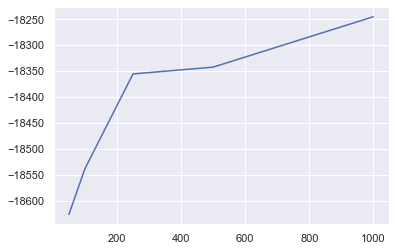

In [79]:
plt.plot(results3.param_grid['model__n_estimators'], results3.cv_results_['mean_test_score']);

Let's try with bigger n_estimators

In [90]:
param_grid4 = {'model__n_estimators':[1000,1500,2000]
              }


cv_model_search4 = GridSearchCV( pipeline_rforest, 
                               param_grid4, 
                               cv = 3,
                               refit=True,
                              error_score='raise',
                               scoring='neg_mean_absolute_error') 


results4 = cv_model_search4.fit(X_train,y_train)

In [93]:
-results4.score(X_val,y_val)

19330.137218591

In [91]:
-results4.best_score_

18262.66972970211

In [92]:
results4.best_params_

{'model__n_estimators': 2000}

No significant upgrade with random forests.
XGB is the winner in this case

In [97]:
xgb_final = make_pipeline( XGBRegressor(learning_rate=0.1, n_estimators=100) )
xgb_final.fit(X,y)

preds = xgb_final.predict(X_test)

output = pd.DataFrame({'Id': X_test.Id,
                       'SalePrice': preds})
output.to_csv('./submission2.csv', index=False)

Result = top 30 % in the kaggle competition, with mse of 0.13618